In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the data
df = pd.read_csv('animal_shelter.csv')
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Outcome
0,A778325,NaN,08/22/2018 07:00:00 PM,08/22/2018 07:00:00 PM,12/12/2017,Dog,Spayed Female,8 months,Chihuahua Longhair Mix,White/Fawn,0
1,A737785,NaN,11/05/2016 09:00:00 AM,11/05/2016 09:00:00 AM,07/20/2016,Cat,Intact Male,3 months,Domestic Medium Hair Mix,Blue/White,0
2,A776337,*Milo,07/28/2018 07:00:00 PM,07/28/2018 07:00:00 PM,07/11/2017,Dog,Neutered Male,1 year,Pointer/Pit Bull,Black/White,0
3,A731745,*Vincente,08/17/2016 02:35:00 PM,08/17/2016 02:35:00 PM,04/27/2016,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black,0
4,A678831,NaN,05/13/2014 01:03:00 PM,05/13/2014 01:03:00 PM,04/21/2014,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Black,0


In [ ]:
df.shape

(5000, 11)

Our data has 5000 rows & 11 columns.

In [ ]:
# Data statistics
df.describe()

,Outcome
count,5000.00000
mean,0.07980
std,0.27101
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Animal ID         5000 non-null   object
 1   Name              3438 non-null   object
 2   DateTime          5000 non-null   object
 3   MonthYear         5000 non-null   object
 4   Date of Birth     5000 non-null   object
 5   Animal Type       5000 non-null   object
 6   Sex upon Outcome  5000 non-null   object
 7   Age upon Outcome  4999 non-null   object
 8   Breed             5000 non-null   object
 9   Color             5000 non-null   object
 10  Outcome           5000 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 429.8+ KB


The columns Name, & Age upon Outcome have missing values. Let's see their percentage.

# Data cleaning

In [ ]:
# Check missing values in % 
df.isnull().sum()/df.shape[0]

Animal ID           0.0000
Name                0.3124
DateTime            0.0000
MonthYear           0.0000
Date of Birth       0.0000
Animal Type         0.0000
Sex upon Outcome    0.0000
Age upon Outcome    0.0002
Breed               0.0000
Color               0.0000
Outcome             0.0000
dtype: float64

Name column has 31.24% of missing values & also it doesn't have any impact on Outcome. Let's drop this column from the data. Also, Animal ID is a just ID of the animal, it doesn't have any impact on Outcome. Let's drop it.

In [ ]:
df_risk = df.drop(['Name','Animal ID'], axis=1)

In [ ]:
# Drop null values if any
df_risk = df_risk.dropna()

In [ ]:
df_risk.isnull().sum()

DateTime            0
MonthYear           0
Date of Birth       0
Animal Type         0
Sex upon Outcome    0
Age upon Outcome    0
Breed               0
Color               0
Outcome             0
dtype: int64

No null values are present.

In [ ]:
df_risk.shape

(4999, 9)

Now our data contains 4999 rows & 9 columns.

In [ ]:
df_risk.head()

,DateTime,MonthYear,Date of Birth,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Outcome
0,08/22/2018 07:00:00 PM,08/22/2018 07:00:00 PM,12/12/2017,Dog,Spayed Female,8 months,Chihuahua Longhair Mix,White/Fawn,0
1,11/05/2016 09:00:00 AM,11/05/2016 09:00:00 AM,07/20/2016,Cat,Intact Male,3 months,Domestic Medium Hair Mix,Blue/White,0
2,07/28/2018 07:00:00 PM,07/28/2018 07:00:00 PM,07/11/2017,Dog,Neutered Male,1 year,Pointer/Pit Bull,Black/White,0
3,08/17/2016 02:35:00 PM,08/17/2016 02:35:00 PM,04/27/2016,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black,0
4,05/13/2014 01:03:00 PM,05/13/2014 01:03:00 PM,04/21/2014,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Black,0


In [ ]:
# Drop duplicates 
df_risk = df_risk.drop_duplicates()

In [ ]:
df_risk.shape

(4992, 9)

7 duplicate rows have been dropped. Now our data contains 4992 rows & 9 columns.

We can also observe that the columns **DateTime & MonthYear** are same. So, let's drop one.

In [ ]:
df_risk.drop('MonthYear', axis=1, inplace=True)

In [ ]:
# Check the data types
df_risk.dtypes

DateTime            object
Date of Birth       object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
Outcome              int64
dtype: object

Except Outcome, all other columns have object data type. So, we need to convert these features to their approriate data types.

**Convert the features to their appropriate data types**

Convert DateTime object type to datetime type.

In [ ]:
df_risk['DateTime'] = pd.to_datetime(df_risk['DateTime'])

# Create month, year, & day features 
df_risk['intake_month'] = df_risk['DateTime'].dt.month
df_risk['intake_year'] = df_risk['DateTime'].dt.year
df_risk['intake_day'] = df_risk['DateTime'].dt.day

In [ ]:
# Similarly convert Date of Birth object type to datetime
df_risk['Date of Birth'] = pd.to_datetime(df_risk['Date of Birth'])

# Create month, year, & day features 
df_risk['born_month'] = df_risk['Date of Birth'].dt.month
df_risk['born_year'] = df_risk['Date of Birth'].dt.year
df_risk['born_day'] = df_risk['Date of Birth'].dt.day

Now convert the columns **Animal Type, Sex upon Outcome, Breed, & Color** from object type to categorical.

In [ ]:
categorical_cols = ['Animal Type', 'Sex upon Outcome', 'Breed', 'Color']
for col in categorical_cols:
    df_risk[col] = df_risk[col].astype('category')

Finally, the column **Age upon Outcome** is numeric column. We need to do some pre-processing.

In [ ]:
# Unique items
df_risk['Age upon Outcome'].unique()

array(['8 months', '3 months', '1 year', '3 weeks', '1 month', '5 years',
       '4 months', '2 months', '4 weeks', '2 weeks', '3 years', '2 years',
       '10 months', '9 months', '4 years', '1 week', '7 years',
       '10 years', '12 years', '8 years', '9 years', '14 years',
       '11 months', '6 months', '5 months', '3 days', '13 years',
       '7 months', '6 years', '0 years', '15 years', '1 weeks',
       '11 years', '4 days', '2 days', '1 day', '5 days', '6 days',
       '19 years', '5 weeks', '18 years', '17 years', '16 years'],
      dtype=object)

We can see that the age is given in months, weeks, days, & years. Let's convert the age in **years**.

In [ ]:
# Create new column named age & initialize with nan values  
df_risk['age'] = np.nan

In [ ]:
for idx, row in df_risk.iterrows():
      if 'months' in row['Age upon Outcome']:
            df_risk['age'][idx] = round(int(df_risk['Age upon Outcome'][idx].split()[0])/12, 2)
      elif 'weeks' in row['Age upon Outcome']:
            df_risk['age'][idx] = round(int(df_risk['Age upon Outcome'][idx].split()[0])/52, 2)
      elif 'days' in row['Age upon Outcome']:
            df_risk['age'][idx] = round(int(df_risk['Age upon Outcome'][idx].split()[0])/365, 2)
      else:
          df_risk['age'][idx] = int(df_risk['Age upon Outcome'][idx].split()[0])

In [ ]:
# Drop Age upon Outcome column  & rename age column 
df_risk.drop('Age upon Outcome', axis=1, inplace=True)
df_risk =  df_risk.rename(columns={'age':'Age upon Outcome'})

In [ ]:
df_risk.head()

,DateTime,Date of Birth,Animal Type,Sex upon Outcome,Breed,Color,Outcome,intake_month,intake_year,intake_day,born_month,born_year,born_day,Age upon Outcome
0,2018-08-22 19:00:00,2017-12-12,Dog,Spayed Female,Chihuahua Longhair Mix,White/Fawn,0,8,2018,22,12,2017,12,0.67
1,2016-11-05 09:00:00,2016-07-20,Cat,Intact Male,Domestic Medium Hair Mix,Blue/White,0,11,2016,5,7,2016,20,0.25
2,2018-07-28 19:00:00,2017-07-11,Dog,Neutered Male,Pointer/Pit Bull,Black/White,0,7,2018,28,7,2017,11,1.00
3,2016-08-17 14:35:00,2016-04-27,Cat,Neutered Male,Domestic Shorthair Mix,Black,0,8,2016,17,4,2016,27,0.25
4,2014-05-13 13:03:00,2014-04-21,Cat,Unknown,Domestic Shorthair Mix,Black,0,5,2014,13,4,2014,21,0.06


Now encode the categorical columns

In [ ]:
cols = ['Animal Type', 'Sex upon Outcome', 'Breed','Color']
for col in cols:
  df_risk[col] = df_risk[col].cat.codes

In [ ]:
# Drop DateTime & Date of Birth
df_risk.drop(['DateTime','Date of Birth'], axis=1, inplace=True)

In [ ]:
df_risk.head()

,Animal Type,Sex upon Outcome,Breed,Color,Outcome,intake_month,intake_year,intake_day,born_month,born_year,born_day,Age upon Outcome
0,2,3,164,208,0,8,2018,22,12,2017,12,0.67
1,1,1,236,51,0,11,2016,5,7,2016,20,0.25
2,2,2,428,25,0,7,2018,28,7,2017,11,1.00
3,1,2,238,1,0,8,2016,17,4,2016,27,0.25
4,1,4,238,1,0,5,2014,13,4,2014,21,0.06


In [ ]:
df_risk.shape

(4992, 12)

Now our preprocessed data contains 4992 rows & 12 features.

In [ ]:
df_risk.columns

Index(['Animal Type', 'Sex upon Outcome', 'Breed', 'Color', 'Outcome',
       'intake_month', 'intake_year', 'intake_day', 'born_month', 'born_year',
       'born_day', 'Age upon Outcome'],
      dtype='object')

In [ ]:
# Save data 
df_risk.to_csv('pre-processed.csv', index=False)

# Normalization

Age upon Outcome is the only continuous column. Let's normalize this column using min-max normalization method.

In [ ]:
normalized_df = df_risk.copy()
col = 'Age upon Outcome'
normalized_df['Age upon Outcome'] = (normalized_df[col]-normalized_df[col].min())/(normalized_df[col].max()-normalized_df[col].min())

In [ ]:
normalized_df.head()

,Animal Type,Sex upon Outcome,Breed,Color,Outcome,intake_month,intake_year,intake_day,born_month,born_year,born_day,Age upon Outcome
0,2,3,164,208,0,8,2018,22,12,2017,12,0.035263
1,1,1,236,51,0,11,2016,5,7,2016,20,0.013158
2,2,2,428,25,0,7,2018,28,7,2017,11,0.052632
3,1,2,238,1,0,8,2016,17,4,2016,27,0.013158
4,1,4,238,1,0,5,2014,13,4,2014,21,0.003158


### Split the data

In [ ]:
X = normalized_df.drop('Outcome', axis=1)
y = normalized_df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

# train (80%) & test (20%)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Identify the most discriminating features to predict the target category using the filter and wrapper feature selection techniques.

### Filter feature selection technique.

Since most of the independent features & dependent feature are categorical, we use **Chi-Square** filter based method to identify the most discriminating features to predict the target category.      
In this method, the selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable.

A chi-square test is used in statistics to test the independence of two events. In our case, we used to determine the relationship between independent variables (features) & dependent variable (response or target). In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Select top 6 best features (45% reduction in features)
bestfeatures = SelectKBest(score_func=chi2, k=6)
bf = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(bf.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score'] 
print(featureScores.nlargest(6,'Score'))

           features        Score
3             Color  1329.139482
2             Breed   348.045980
0       Animal Type   216.867995
1  Sex upon Outcome    91.730483
9          born_day    13.310228
4      intake_month     9.589483


The top feature for predicting our outcome is **Color** followed by **Breed**.

In [ ]:
best_features = featureScores.nlargest(6,'Score')
best_columns_filter = best_features.features.tolist()
# Top 6 features
best_columns_filter

['Color',
 'Breed',
 'Animal Type',
 'Sex upon Outcome',
 'born_day',
 'intake_month']

### Wrapper feature selection technique

There are 3 wrapper feature selection techniques. In general backward feature selection/elimination method is preferred compare to others due to its superior performance. So, we also use the same technique to identify most identify the most discriminating features to predict the target category.

In wrapper methods, we try to use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from your subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.    
In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

We use Decision tree, Naive Bayes, SVM, & KNN algorithms in wrapper feature selection method to identify best features from each algorithm.

### Decision tree

We use **mlxtend** library that contains built-in implementation for most of the wrapper methods based feature selection techniques. **SequentialFeatureSelector()** function comes with various combinations of feature selection techniques

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Sequential backward selection(sbs)
sbs_dtc = SFS(DecisionTreeClassifier(random_state=42),
         k_features=6,
         forward=False,
         floating=False,
         verbose=2,
         scoring='accuracy',
         cv=10)

In [ ]:
# Fit the selector
dtc_features = sbs_dtc.fit(X_train.values, y_train.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.7s finished

[2021-11-07 10:59:23] Features: 10/6 -- score: 0.9216190476190477[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished

[2021-11-07 10:59:25] Features: 9/6 -- score: 0.9206090225563909[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.2s finished

[2021-11-07 10:59:26] Features: 8/6 -- score: 0.9213621553884712[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [ ]:
# 6 best features 
best_feats_bs_dtc = X_train.columns[list(dtc_features.k_feature_idx_)]
best_feats_bs_dtc

Index(['Animal Type', 'Sex upon Outcome', 'Breed', 'intake_month',
       'intake_day', 'born_year'],
      dtype='object')

### Naive Bayes

Since most independent features are discrete in nature, we use [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Sequential backward selection(sbs)
sbs_nbc = SFS(MultinomialNB(),
         k_features=6,
         forward=False,
         floating=False,
         verbose=2,
         scoring='accuracy',
         cv=10)

In [ ]:
# Fit the selector
nbc_features = sbs_nbc.fit(X_train.values, y_train.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2021-11-07 10:59:28] Features: 10/6 -- score: 0.7405494987468672[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2021-11-07 10:59:28] Features: 9/6 -- score: 0.9228652882205512[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2021-11-07 10:59:28] Features: 8/6 -- score: 0.9228652882205512[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [ ]:
# 6 best features 
best_feats_bs_nbc = X_train.columns[list(nbc_features.k_feature_idx_)]
best_feats_bs_nbc

Index(['Animal Type', 'Sex upon Outcome', 'intake_month', 'intake_year',
       'born_month', 'born_day'],
      dtype='object')

### SVM

In [ ]:
from sklearn.svm import SVC
#Sequential backward selection(sbs)
sbs_svc = SFS(SVC(),
         k_features=6,
         forward=False,
         floating=False,
         verbose=2,
         scoring='accuracy',
         cv=10)

In [ ]:
# Fit the selector
svc_features = sbs_svc.fit(X_train.values, y_train.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   12.9s finished

[2021-11-07 10:59:43] Features: 10/6 -- score: 0.9193596491228069[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.3s finished

[2021-11-07 10:59:54] Features: 9/6 -- score: 0.9193596491228069[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.7s finished

[2021-11-07 11:00:04] Features: 8/6 -- score: 0.9193596491228069[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [ ]:
# 6 best features 
best_feats_bs_svc = X_train.columns[list(svc_features.k_feature_idx_)]
best_feats_bs_svc

Index(['Animal Type', 'Sex upon Outcome', 'Breed', 'Color', 'intake_month',
       'intake_year'],
      dtype='object')

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Sequential backward selection(sbs)
sbs_knn = SFS(KNeighborsClassifier(),
         k_features=6,
         forward=False,
         floating=False,
         verbose=2,
         scoring='accuracy',
         cv=10)

In [ ]:
# Fit the selector
knn_features = sbs_knn.fit(X_train.values, y_train.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.5s finished

[2021-11-07 11:00:24] Features: 10/6 -- score: 0.9436553884711779[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.2s finished

[2021-11-07 11:00:27] Features: 9/6 -- score: 0.9439078947368422[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.0s finished

[2021-11-07 11:00:29] Features: 8/6 -- score: 0.9484097744360902[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [ ]:
# 6 best features 
best_feats_bs_knn = X_train.columns[list(knn_features.k_feature_idx_)]
best_feats_bs_knn

Index(['Animal Type', 'Sex upon Outcome', 'Breed', 'intake_month',
       'intake_year', 'Age upon Outcome'],
      dtype='object')

### Report the selected features for both filter & wrapper based methods

In [ ]:
features_df = pd.DataFrame()
features_df['filter_feats'] = sorted(best_columns_filter)              # Chi-Square
features_df['wrapper_dt'] = sorted(best_feats_bs_dtc.tolist())         # Decision tree  
features_df['wrapper_svc'] = sorted(best_feats_bs_svc.tolist())        # Support vector classifier
features_df['wrapper_nb'] = sorted(best_feats_bs_nbc.tolist())         # Naive bayes
features_df['wrapper_knn'] = sorted(best_feats_bs_knn.tolist())        # KNN

features_df

,filter_feats,wrapper_dt,wrapper_svc,wrapper_nb,wrapper_knn
0,Animal Type,Animal Type,Animal Type,Animal Type,Age upon Outcome
1,Breed,Breed,Breed,Sex upon Outcome,Animal Type
2,Color,Sex upon Outcome,Color,born_day,Breed
3,Sex upon Outcome,born_year,Sex upon Outcome,born_month,Sex upon Outcome
4,born_day,intake_day,intake_month,intake_month,intake_month
5,intake_month,intake_month,intake_year,intake_year,intake_year


Insights:   
* We can see 3 common selected best features for both filter & wrapper based methods viz., **Animal Type**, **Sex upon Outcome**, & **intake_month**.    
* Top most feature is **Animal Type** selected by both methods.    
* Except wrapper_nb, all other methods selected **Breed** as best common feature.

## **Explore the effect of different parameter settings on these classifiers for each subset of features**.

### **With the subset of features obtained from filter method**

In [ ]:
import os
import pickle
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
x_train = X_train[best_columns_filter]
x_test = X_test[best_columns_filter]

We are using **f1-score** to evaluate our models.

In [ ]:
# Define a function to train the models & get predictions
def train_and_evaluate_models(model, params, x_train, x_test, y_train, model_name:str=None, model_key=None):
  # Initialize the estimator
  estimator = model()
  # Type of scoring used to compare parameter combinations
  acc_scorer = metrics.make_scorer(metrics.f1_score)

  # Run the grid search to get the best parameter settings
  grid_obj = GridSearchCV(estimator, params, scoring=acc_scorer,cv=3)
  grid_obj = grid_obj.fit(x_train, y_train)
  
  print('Best parameters are:')
  params = grid_obj.best_params_
  print(grid_obj.best_params_)

  if model_key=='dt':              
    # Initialize the model with best parameters
    model_best = model(max_depth = params['max_depth'], min_samples_split=params['min_samples_split'], 
                     criterion = params['criterion'], splitter = params['splitter'], 
                     max_features = params['max_features'], class_weight = params['class_weight'], random_state=42)
  elif model_key=='nb':            # Naive Bayes
    model_best = model(alpha = params['alpha'], fit_prior=params['fit_prior'])
  elif model_key=='svm':           # Support vector machine
    model_best = model(C=params['C'], kernel=params['kernel'], class_weight = params['class_weight'],
                       decision_function_shape = params['decision_function_shape'], random_state=42)
  elif model_key=='knn':          # KNN
    model_best = model(n_neighbors=params['n_neighbors'], weights=params['weights'])

  # Fit the model
  model_best.fit(x_train, y_train)
  
  # Save the model 
  if not os.path.exists('./models'):
    os.mkdir('./models')
  with open(f'./models/{model_name}.pkl', 'wb') as f:
    pickle.dump(model_best, f)
  # Get predictions 
  y_pred = model_best.predict(x_test)

  return y_pred

**Decision tree Classifier**

In [ ]:
%%time
# Grid of parameters to choose from
dtc_params = {'max_depth': np.arange(2,20), 
              'min_samples_split' : [2, 3, 5, 10, 12],
              'criterion':['gini', 'entropy'],
              'splitter':['best','entropy'],
              'max_features':['auto','sqrt', 'log2'],
              'class_weight' : ['balanced', 'balanced_subsample']
             }

y_pred_dtc_filter = train_and_evaluate_models(DecisionTreeClassifier, dtc_params, x_train, x_test, y_train, 'Decision_tree_filter',
                                              model_key='dt')

Best parameters are:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 5, 'splitter': 'best'}
CPU times: user 27.8 s, sys: 99.9 ms, total: 27.9 s
Wall time: 27.9 s


In [ ]:
# Calculate metrics
acc_dtc_filter = metrics.accuracy_score(y_test, y_pred_dtc_filter)
f1_dtc_filter = metrics.f1_score(y_test, y_pred_dtc_filter, average='weighted')

print(f'Accuracy : {acc_dtc_filter:.2}')
print(f'F1-score : {f1_dtc_filter:.2}')

Accuracy : 0.92
F1-score : 0.92


In [ ]:
from scikitplot.metrics import plot_confusion_matrix

**Confusion matrix**

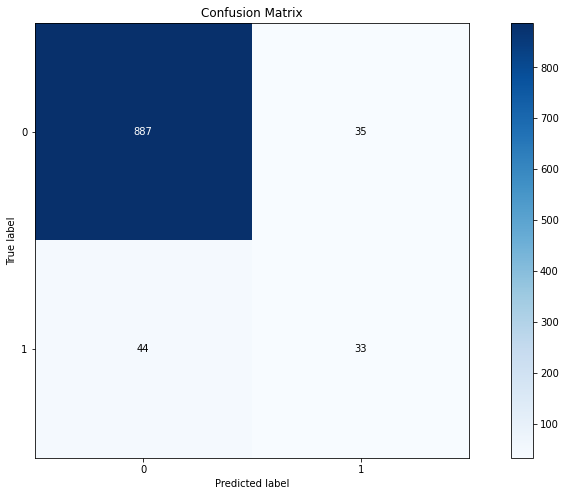

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_dtc_filter, normalize=False,figsize=(15,8))

The class **1** indicates that after intake, the animal
outcome was negative, e.g., **death**, while the value **0** indicates that the
animal outcome was a positive one, e.g., **was adopted or returned to the owner**.

**Classification Report:**

In [ ]:
class_report = metrics.classification_report(y_test, y_pred_dtc_filter)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       922
           1       0.49      0.43      0.46        77

    accuracy                           0.92       999
   macro avg       0.72      0.70      0.71       999
weighted avg       0.92      0.92      0.92       999



**Plot ROC curve**

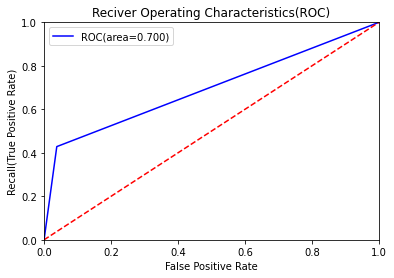

AUC: 0.7


In [ ]:
#ROC_AUC curve
def plot_ROC(y_test, y_pred):
  plt.figure()
  false_positive_rate, recall, thresholds=metrics.roc_curve(y_test, y_pred, pos_label=1)
  auc=round(metrics.auc(false_positive_rate, recall), 2)
  plt.title('Reciver Operating Characteristics(ROC)')
  plt.plot(false_positive_rate, recall,'b',label='ROC(area=%0.3f)' %auc)
  plt.legend()
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.0])
  plt.ylabel('Recall(True Positive Rate)')
  plt.xlabel('False Positive Rate')
  plt.show()
  print('AUC:',auc)
  return auc
auc_dtc_filter = plot_ROC(y_test, y_pred_dtc_filter)

**Naïve Bayes**

In [ ]:
%%time
# Grid of parameters to choose from
nb_params = {'alpha': [0, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0], 
              'fit_prior' : ['True', 'False']
             }

y_pred_nb_filter = train_and_evaluate_models(MultinomialNB, nb_params, x_train, x_test, y_train, 'MultinomialNB_filter', model_key='nb')

Best parameters are:
{'alpha': 0, 'fit_prior': 'True'}
CPU times: user 312 ms, sys: 1.99 ms, total: 313 ms
Wall time: 315 ms


In [ ]:
# Calculate metrics
acc_nb_filter = metrics.accuracy_score(y_test, y_pred_nb_filter)
f1_nb_filter = metrics.f1_score(y_test, y_pred_nb_filter, average='weighted')

print(f'Accuracy : {acc_nb_filter:.2}')
print(f'F1-score : {f1_nb_filter:.2}')

Accuracy : 0.56
F1-score : 0.66


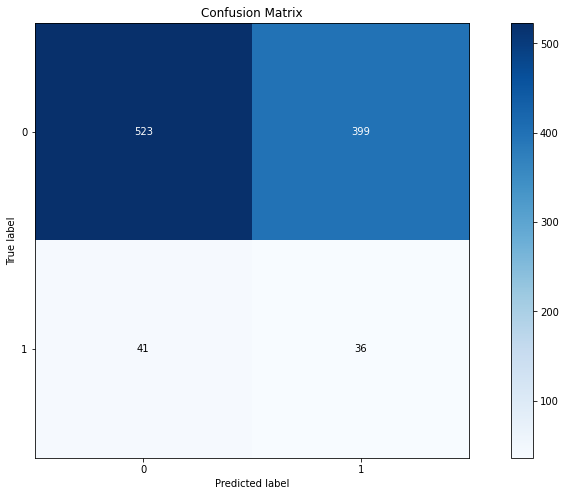

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_nb_filter, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_nb_filter)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.57      0.70       922
           1       0.08      0.47      0.14        77

    accuracy                           0.56       999
   macro avg       0.51      0.52      0.42       999
weighted avg       0.86      0.56      0.66       999



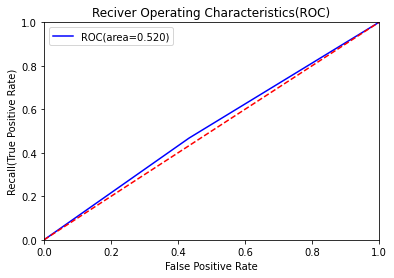

AUC: 0.52


In [ ]:
# Plot ROC curve
auc_nb_filter = plot_ROC(y_test, y_pred_nb_filter)

**SVM**

In [ ]:
%%time
# Grid of parameters to choose from
svm_params = {'C': [0.6, 0.8, 1.0], 
              'kernel' : ['linear','rbf'],
              'class_weight' : ['balanced', 'balanced_subsample'],
              'decision_function_shape':['ovo','ovr']
             }

y_pred_svc_filter = train_and_evaluate_models(SVC, svm_params, x_train, x_test, y_train, 'SVC_filter', model_key='svm')

Best parameters are:
{'C': 0.6, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'linear'}
CPU times: user 12min 2s, sys: 789 ms, total: 12min 3s
Wall time: 11min 59s


In [ ]:
# Calculate metrics
acc_svm_filter = metrics.accuracy_score(y_test, y_pred_svc_filter)
f1_svm_filter = metrics.f1_score(y_test, y_pred_svc_filter, average='weighted')

print(f'Accuracy : {acc_svm_filter:.2}')
print(f'F1-score : {f1_svm_filter:.2}')

Accuracy : 0.95
F1-score : 0.94


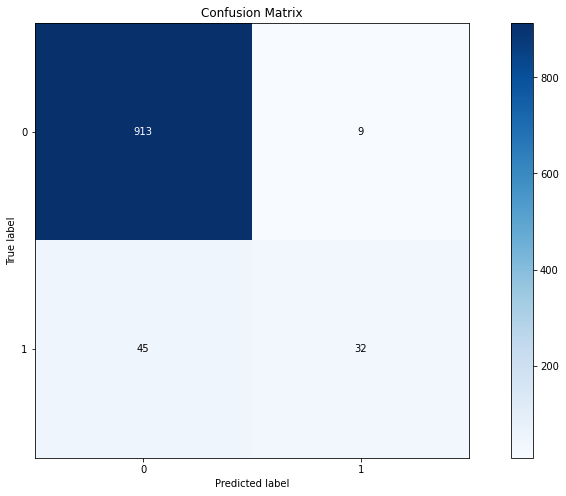

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_svc_filter, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_svc_filter)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       922
           1       0.78      0.42      0.54        77

    accuracy                           0.95       999
   macro avg       0.87      0.70      0.76       999
weighted avg       0.94      0.95      0.94       999



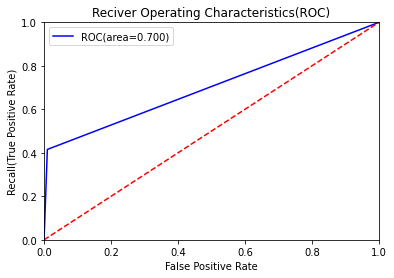

AUC: 0.7


In [ ]:
# Plot ROC curve
auc_svc_filter = plot_ROC(y_test, y_pred_svc_filter)

**KNN**

In [ ]:
%%time
# Grid of parameters to choose from
knn_params = {'n_neighbors': [2, 3, 4, 5, 7], 
              'weights' : ['uniform','distance']
             }

y_pred_knn_filter = train_and_evaluate_models(KNeighborsClassifier, knn_params, x_train, x_test, y_train, 'KNN_filter', model_key='knn')

Best parameters are:
{'n_neighbors': 7, 'weights': 'distance'}
CPU times: user 1.06 s, sys: 10 ms, total: 1.07 s
Wall time: 1.08 s


In [ ]:
# Calculate metrics
acc_knn_filter = metrics.accuracy_score(y_test, y_pred_knn_filter)
f1_knn_filter = metrics.f1_score(y_test, y_pred_knn_filter, average='weighted')

print(f'Accuracy : {acc_knn_filter:.2}')
print(f'F1-score : {f1_knn_filter:.2}')

Accuracy : 0.94
F1-score : 0.93


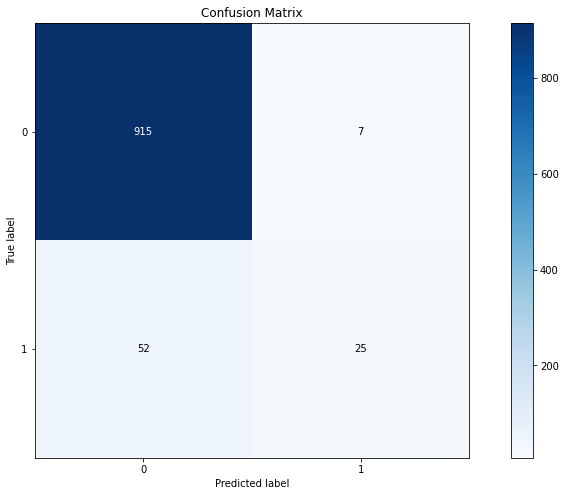

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_knn_filter, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_knn_filter)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       922
           1       0.78      0.32      0.46        77

    accuracy                           0.94       999
   macro avg       0.86      0.66      0.71       999
weighted avg       0.93      0.94      0.93       999



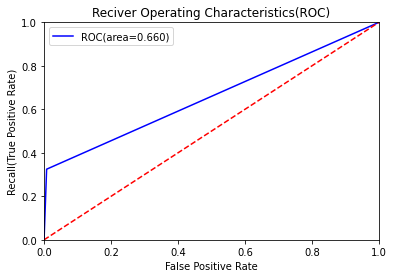

AUC: 0.66


In [ ]:
# Plot ROC curve
auc_knn_filter = plot_ROC(y_test, y_pred_knn_filter)

### **With the subset of features obtained from Wrapper method using Decision tree**

In [ ]:
x_train_dt = X_train[best_feats_bs_dtc]
x_test_dt = X_test[best_feats_bs_dtc]

**Decision tree Classifier**

In [ ]:
%%time
y_pred_dtc_wrapper_dtc = train_and_evaluate_models(DecisionTreeClassifier, dtc_params, x_train_dt, x_test_dt, y_train, 'Decision_tree_wrapper_dtc',
                                              model_key='dt')

Best parameters are:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 10, 'splitter': 'best'}
CPU times: user 26.9 s, sys: 115 ms, total: 27 s
Wall time: 27 s


In [ ]:
# Calculate metrics
acc_dtc_wrapper_dtc = metrics.accuracy_score(y_test, y_pred_dtc_wrapper_dtc)
f1_dtc_wrapper_dtc = metrics.f1_score(y_test, y_pred_dtc_wrapper_dtc, average='weighted')

print(f'Accuracy : {acc_dtc_wrapper_dtc:.2}')
print(f'F1-score : {f1_dtc_wrapper_dtc:.2}')

Accuracy : 0.95
F1-score : 0.94


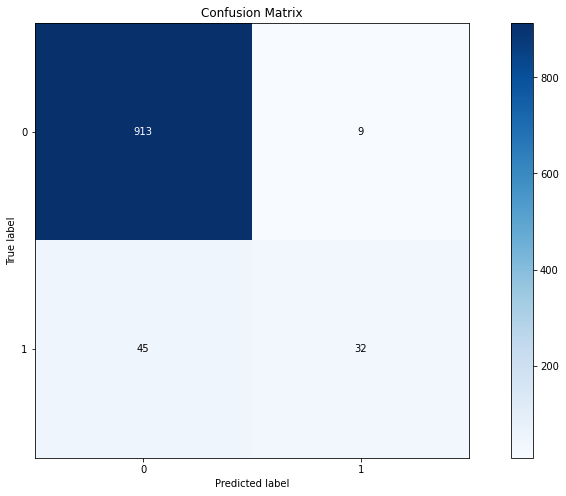

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_dtc_wrapper_dtc, normalize=False,figsize=(15,8))

In [ ]:
# Classification report 
class_report = metrics.classification_report(y_test, y_pred_dtc_wrapper_dtc)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       922
           1       0.78      0.42      0.54        77

    accuracy                           0.95       999
   macro avg       0.87      0.70      0.76       999
weighted avg       0.94      0.95      0.94       999



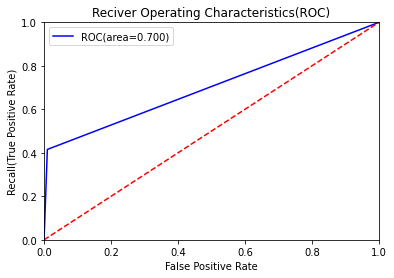

AUC: 0.7


In [ ]:
# Plot ROC
auc_dtc_wrapper_dtc = plot_ROC(y_test, y_pred_dtc_wrapper_dtc)

**Naïve Bayes**

In [ ]:
%%time
y_pred_nb_wrapper_dtc = train_and_evaluate_models(MultinomialNB, nb_params, x_train_dt, x_test_dt, y_train, 'MultinomialNB_wrapper_dtc', model_key='nb')

Best parameters are:
{'alpha': 0, 'fit_prior': 'True'}
CPU times: user 333 ms, sys: 3 ms, total: 336 ms
Wall time: 341 ms


In [ ]:
# Calculate metrics
acc_nb_wrapper_dtc = metrics.accuracy_score(y_test, y_pred_nb_wrapper_dtc)
f1_nb_wrapper_dtc = metrics.f1_score(y_test, y_pred_nb_wrapper_dtc, average='weighted')

print(f'Accuracy : {acc_nb_wrapper_dtc:.2}')
print(f'F1-score : {f1_nb_wrapper_dtc:.2}')

Accuracy : 0.74
F1-score : 0.8


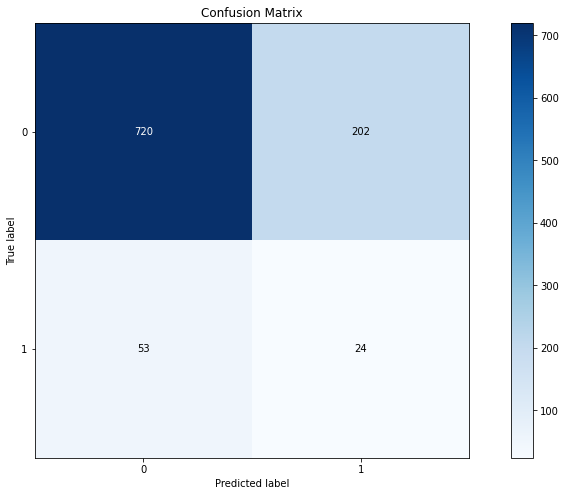

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_nb_wrapper_dtc, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_nb_wrapper_dtc)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       922
           1       0.11      0.31      0.16        77

    accuracy                           0.74       999
   macro avg       0.52      0.55      0.50       999
weighted avg       0.87      0.74      0.80       999



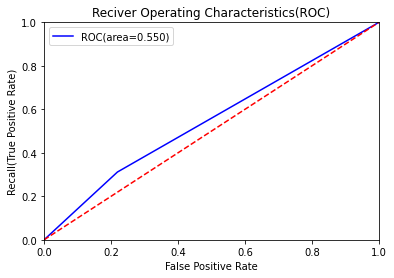

AUC: 0.55


In [ ]:
# Plot ROC curve
auc_nb_wrapper_dtc = plot_ROC(y_test, y_pred_nb_wrapper_dtc)

**SVM**

In [ ]:
%%time 
y_pred_svc_wrapper_dtc = train_and_evaluate_models(SVC, svm_params, x_train_dt, x_test_dt, y_train, 'SVC_wrapper_dt', model_key='svm')

Best parameters are:
{'C': 0.6, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'linear'}
CPU times: user 11min 20s, sys: 685 ms, total: 11min 20s
Wall time: 11min 16s


In [ ]:
# Calculate metrics
acc_svm_wrapper_dtc = metrics.accuracy_score(y_test, y_pred_svc_wrapper_dtc)
f1_svm_wrapper_dtc = metrics.f1_score(y_test, y_pred_svc_wrapper_dtc, average='weighted')

print(f'Accuracy : {acc_svm_wrapper_dtc:.2}')
print(f'F1-score : {f1_svm_wrapper_dtc:.2}')

Accuracy : 0.95
F1-score : 0.94


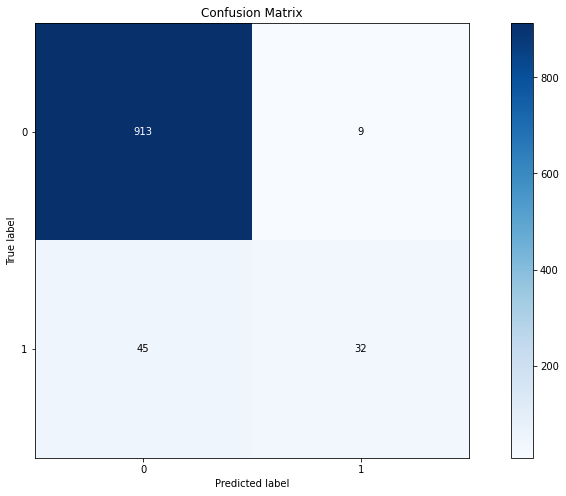

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_svc_wrapper_dtc, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_svc_wrapper_dtc)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       922
           1       0.78      0.42      0.54        77

    accuracy                           0.95       999
   macro avg       0.87      0.70      0.76       999
weighted avg       0.94      0.95      0.94       999



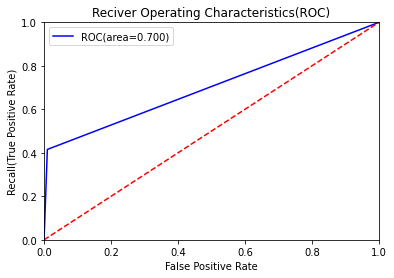

AUC: 0.7


In [ ]:
# Plot ROC curve
auc_svc_wrapper_dtc = plot_ROC(y_test, y_pred_svc_wrapper_dtc)

**KNN**

In [ ]:
y_pred_knn_wrapper_dtc = train_and_evaluate_models(KNeighborsClassifier, knn_params, x_train_dt, x_test_dt, y_train, 'KNN_wrapper_dt', model_key='knn')

Best parameters are:
{'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
# Calculate metrics
acc_knn_wrapper_dtc = metrics.accuracy_score(y_test, y_pred_knn_wrapper_dtc)
f1_knn_wrapper_dtc = metrics.f1_score(y_test, y_pred_knn_wrapper_dtc, average='weighted')

print(f'Accuracy : {acc_knn_wrapper_dtc:.2}')
print(f'F1-score : {f1_knn_wrapper_dtc:.2}')

Accuracy : 0.94
F1-score : 0.93


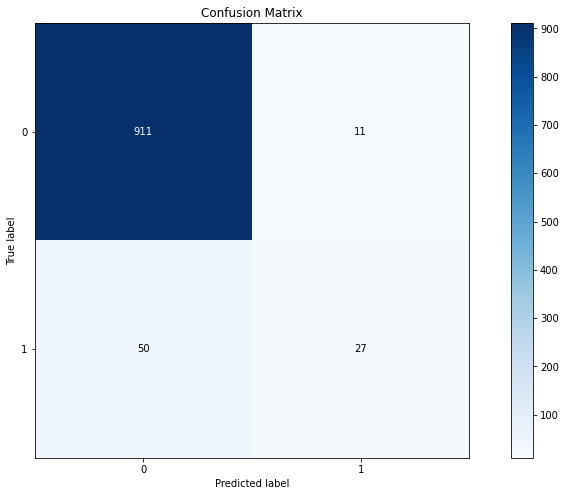

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_knn_wrapper_dtc, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_knn_wrapper_dtc)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       922
           1       0.71      0.35      0.47        77

    accuracy                           0.94       999
   macro avg       0.83      0.67      0.72       999
weighted avg       0.93      0.94      0.93       999



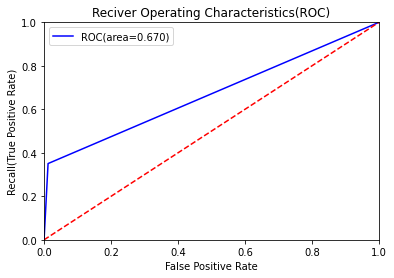

AUC: 0.67


In [ ]:
# Plot ROC curve
auc_knn_wrapper_dtc = plot_ROC(y_test, y_pred_knn_wrapper_dtc)

### **With the subset of features obtained from Wrapper method using Naive Bayes**

In [ ]:
x_train_nb = X_train[best_feats_bs_nbc]
x_test_nb = X_test[best_feats_bs_nbc]

**Decision tree Classifier**

In [ ]:
%%time
y_pred_dtc_wrapper_nb = train_and_evaluate_models(DecisionTreeClassifier, dtc_params, x_train_nb, x_test_nb, y_train, 'Decision_tree_wrapper_nb',
                                              model_key='dt')

Best parameters are:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}
CPU times: user 24.8 s, sys: 109 ms, total: 24.9 s
Wall time: 24.9 s


In [ ]:
# Calculate metrics
acc_dtc_wrapper_nb = metrics.accuracy_score(y_test, y_pred_dtc_wrapper_nb)
f1_dtc_wrapper_nb = metrics.f1_score(y_test, y_pred_dtc_wrapper_nb, average='weighted')

print(f'Accuracy : {acc_dtc_wrapper_nb:.2}')
print(f'F1-score : {f1_dtc_wrapper_nb:.2}')

Accuracy : 0.95
F1-score : 0.94


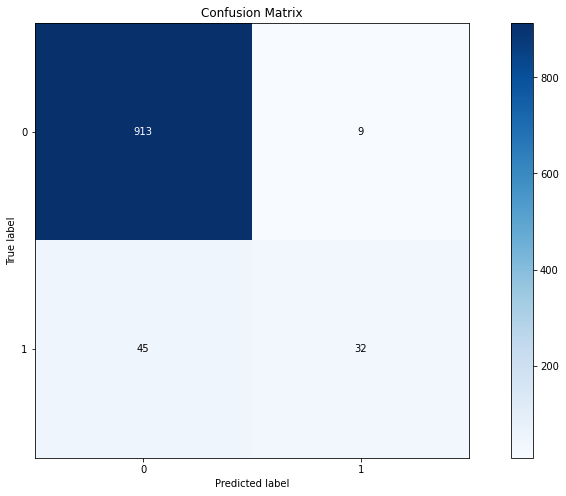

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_dtc_wrapper_nb, normalize=False,figsize=(15,8))

In [ ]:
# Classification report 
class_report = metrics.classification_report(y_test, y_pred_dtc_wrapper_nb)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       922
           1       0.78      0.42      0.54        77

    accuracy                           0.95       999
   macro avg       0.87      0.70      0.76       999
weighted avg       0.94      0.95      0.94       999



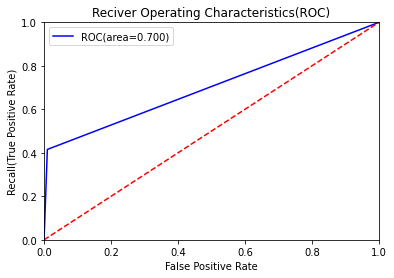

AUC: 0.7


In [ ]:
# Plot ROC
auc_dtc_wrapper_nb = plot_ROC(y_test, y_pred_dtc_wrapper_nb)

**Naïve Bayes**

In [ ]:
%%time
y_pred_nb_wrapper_nb = train_and_evaluate_models(MultinomialNB, nb_params, x_train_nb, x_test_nb, y_train, 'MultinomialNB_wrapper_nb', model_key='nb')

Best parameters are:
{'alpha': 0, 'fit_prior': 'True'}
CPU times: user 296 ms, sys: 1.01 ms, total: 297 ms
Wall time: 301 ms


In [ ]:
# Calculate metrics
acc_nb_wrapper_nb = metrics.accuracy_score(y_test, y_pred_nb_wrapper_nb)
f1_nb_wrapper_nb = metrics.f1_score(y_test, y_pred_nb_wrapper_nb, average='weighted')

print(f'Accuracy : {acc_nb_wrapper_nb:.2}')
print(f'F1-score : {f1_nb_wrapper_nb:.2}')

Accuracy : 0.93
F1-score : 0.9


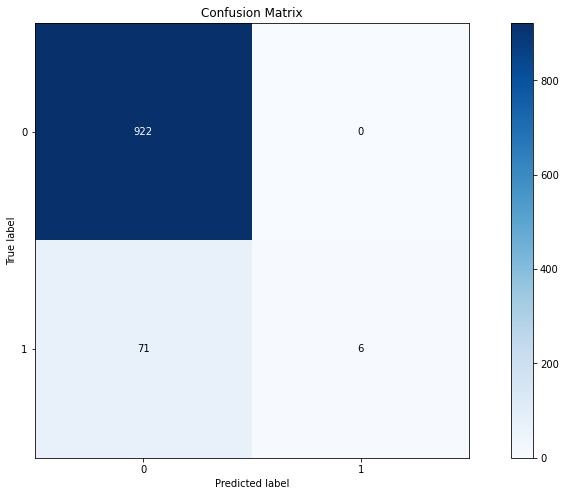

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_nb_wrapper_nb, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_nb_wrapper_nb)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       922
           1       1.00      0.08      0.14        77

    accuracy                           0.93       999
   macro avg       0.96      0.54      0.55       999
weighted avg       0.93      0.93      0.90       999



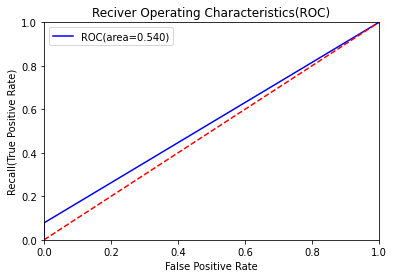

AUC: 0.54


In [ ]:
# Plot ROC curve
auc_nb_wrapper_nb = plot_ROC(y_test, y_pred_nb_wrapper_nb)

**SVM**

In [ ]:
%%time 
y_pred_svc_wrapper_nb = train_and_evaluate_models(SVC, svm_params, x_train_nb, x_test_nb, y_train, 'SVC_wrapper_nb', model_key='svm')

Best parameters are:
{'C': 0.6, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'linear'}
CPU times: user 27.5 s, sys: 94 ms, total: 27.6 s
Wall time: 27.5 s


In [ ]:
# Calculate metrics
acc_svm_wrapper_nb = metrics.accuracy_score(y_test, y_pred_svc_wrapper_nb)
f1_svm_wrapper_nb = metrics.f1_score(y_test, y_pred_svc_wrapper_nb, average='weighted')

print(f'Accuracy : {acc_svm_wrapper_nb:.2}')
print(f'F1-score : {f1_svm_wrapper_nb:.2}')

Accuracy : 0.95
F1-score : 0.94


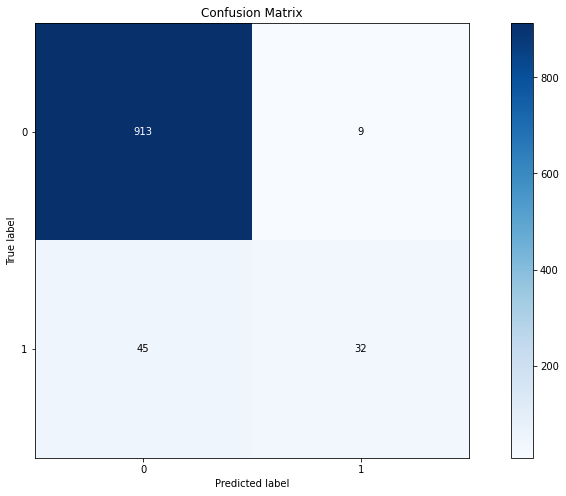

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_svc_wrapper_nb, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_svc_wrapper_nb)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       922
           1       0.78      0.42      0.54        77

    accuracy                           0.95       999
   macro avg       0.87      0.70      0.76       999
weighted avg       0.94      0.95      0.94       999



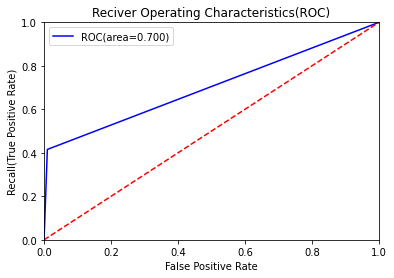

AUC: 0.7


In [ ]:
# Plot ROC curve
auc_svc_wrapper_nb = plot_ROC(y_test, y_pred_svc_wrapper_nb)

**KNN**

In [ ]:
%%time
y_pred_knn_wrapper_nb = train_and_evaluate_models(KNeighborsClassifier, knn_params, x_train_nb, x_test_nb, y_train, 'KNN_wrapper_nb', model_key='knn')

Best parameters are:
{'n_neighbors': 2, 'weights': 'distance'}
CPU times: user 1.09 s, sys: 8.01 ms, total: 1.09 s
Wall time: 1.09 s


In [ ]:
# Calculate metrics
acc_knn_wrapper_nb = metrics.accuracy_score(y_test, y_pred_knn_wrapper_nb)
f1_knn_wrapper_nb = metrics.f1_score(y_test, y_pred_knn_wrapper_nb, average='weighted')

print(f'Accuracy : {acc_knn_wrapper_nb:.2}')
print(f'F1-score : {f1_knn_wrapper_nb:.2}')

Accuracy : 0.93
F1-score : 0.92


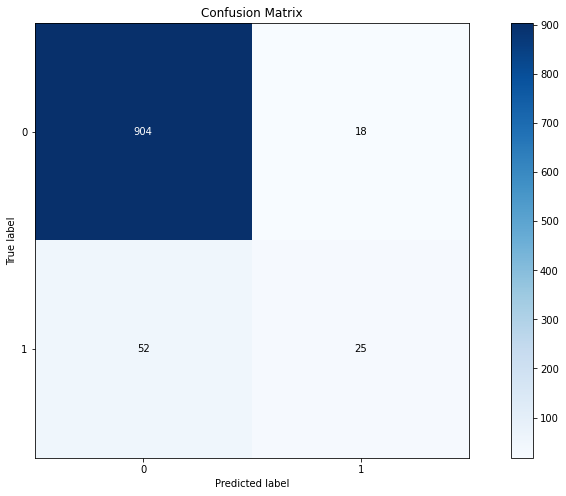

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_knn_wrapper_nb, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_knn_wrapper_nb)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       922
           1       0.58      0.32      0.42        77

    accuracy                           0.93       999
   macro avg       0.76      0.65      0.69       999
weighted avg       0.92      0.93      0.92       999



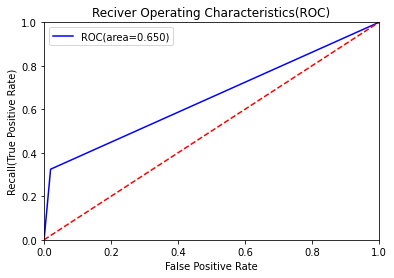

AUC: 0.65


In [ ]:
# Plot ROC curve
auc_knn_wrapper_nb = plot_ROC(y_test, y_pred_knn_wrapper_nb)

### **With the subset of features obtained from Wrapper method using SVM**

In [ ]:
x_train_svm = X_train[best_feats_bs_svc]
x_test_svm = X_test[best_feats_bs_svc]

**Decision tree Classifier**

In [ ]:
%%time
y_pred_dtc_wrapper_svm = train_and_evaluate_models(DecisionTreeClassifier, dtc_params, x_train_svm, x_test_svm, y_train, 'Decision_tree_wrapper_svm',
                                              model_key='dt')

Best parameters are:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 10, 'splitter': 'best'}
CPU times: user 25.6 s, sys: 86 ms, total: 25.7 s
Wall time: 25.7 s


In [ ]:
# Calculate metrics
acc_dtc_wrapper_svm = metrics.accuracy_score(y_test, y_pred_dtc_wrapper_svm)
f1_dtc_wrapper_svm = metrics.f1_score(y_test, y_pred_dtc_wrapper_svm, average='weighted')

print(f'Accuracy : {acc_dtc_wrapper_svm:.2}')
print(f'F1-score : {f1_dtc_wrapper_svm:.2}')

Accuracy : 0.95
F1-score : 0.94


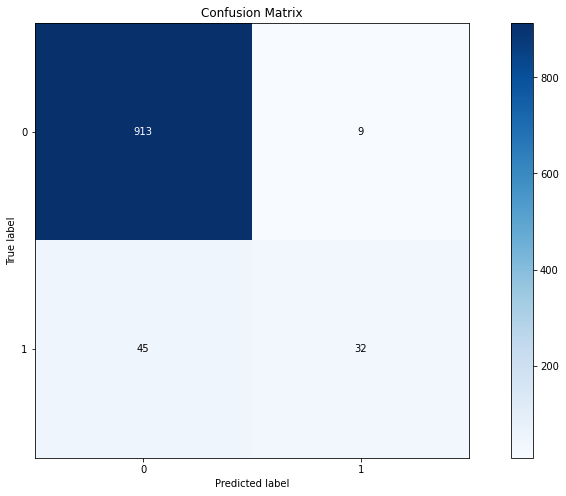

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_dtc_wrapper_svm, normalize=False,figsize=(15,8))

In [ ]:
# Classification report 
class_report = metrics.classification_report(y_test, y_pred_dtc_wrapper_svm)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       922
           1       0.78      0.42      0.54        77

    accuracy                           0.95       999
   macro avg       0.87      0.70      0.76       999
weighted avg       0.94      0.95      0.94       999



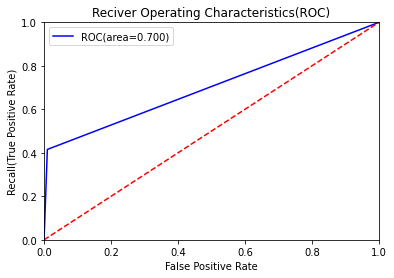

AUC: 0.7


In [ ]:
# Plot ROC curve
auc_dtc_wrapper_svm = plot_ROC(y_test, y_pred_dtc_wrapper_svm)

**Naïve Bayes**

In [ ]:
%%time
y_pred_nb_wrapper_svm = train_and_evaluate_models(MultinomialNB, nb_params, x_train_svm, x_test_svm, y_train, 'MultinomialNB_wrapper_svm', model_key='nb')

Best parameters are:
{'alpha': 0, 'fit_prior': 'True'}
CPU times: user 308 ms, sys: 1e+03 µs, total: 309 ms
Wall time: 308 ms


In [ ]:
# Calculate metrics
acc_nb_wrapper_svm = metrics.accuracy_score(y_test, y_pred_nb_wrapper_svm)
f1_nb_wrapper_svm = metrics.f1_score(y_test, y_pred_nb_wrapper_svm, average='weighted')

print(f'Accuracy : {acc_nb_wrapper_svm:.2}')
print(f'F1-score : {f1_nb_wrapper_svm:.2}')

Accuracy : 0.52
F1-score : 0.62


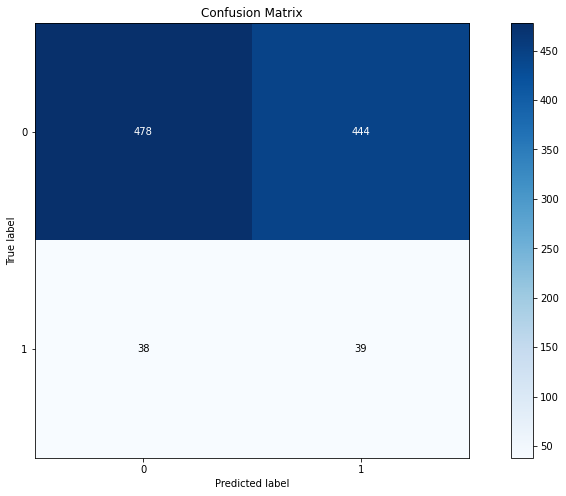

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_nb_wrapper_svm, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_nb_wrapper_svm)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.52      0.66       922
           1       0.08      0.51      0.14        77

    accuracy                           0.52       999
   macro avg       0.50      0.51      0.40       999
weighted avg       0.86      0.52      0.62       999



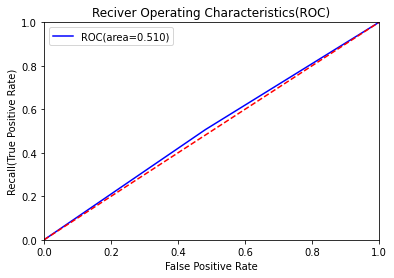

AUC: 0.51


In [ ]:
# Plot ROC curve
auc_nb_wrapper_svm = plot_ROC(y_test, y_pred_nb_wrapper_svm)

**SVM**

In [ ]:
%%time 
y_pred_svc_wrapper_svm = train_and_evaluate_models(SVC, svm_params, x_train_svm, x_test_svm, y_train, 'SVC_wrapper_svm', model_key='svm')

Best parameters are:
{'C': 0.6, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'linear'}
CPU times: user 12min 19s, sys: 680 ms, total: 12min 19s
Wall time: 12min 15s


In [ ]:
# Calculate metrics
acc_svm_wrapper_svm = metrics.accuracy_score(y_test, y_pred_svc_wrapper_svm)
f1_svm_wrapper_svm = metrics.f1_score(y_test, y_pred_svc_wrapper_svm, average='weighted')

print(f'Accuracy : {acc_svm_wrapper_svm:.2}')
print(f'F1-score : {f1_svm_wrapper_svm:.2}')

Accuracy : 0.95
F1-score : 0.94


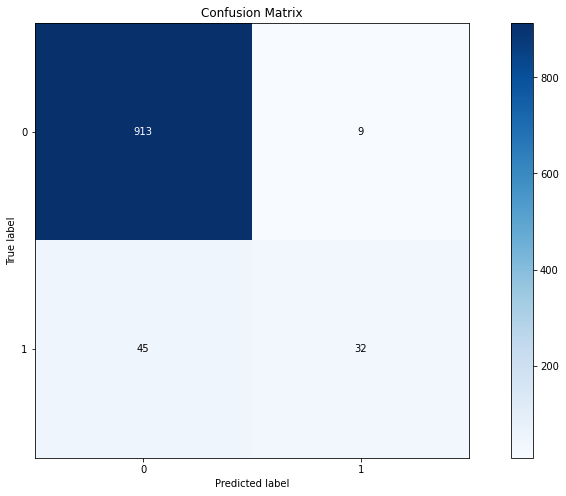

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_svc_wrapper_svm, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_svc_wrapper_svm)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       922
           1       0.78      0.42      0.54        77

    accuracy                           0.95       999
   macro avg       0.87      0.70      0.76       999
weighted avg       0.94      0.95      0.94       999



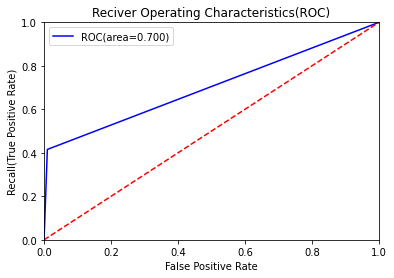

AUC: 0.7


In [ ]:
# Plot ROC curve
auc_svc_wrapper_svm = plot_ROC(y_test, y_pred_svc_wrapper_svm)

**KNN**

In [ ]:
%%time
y_pred_knn_wrapper_svm = train_and_evaluate_models(KNeighborsClassifier, knn_params, x_train_svm, x_test_svm, y_train, 'KNN_wrapper_svm', model_key='knn')

Best parameters are:
{'n_neighbors': 4, 'weights': 'distance'}
CPU times: user 1.05 s, sys: 4 ms, total: 1.06 s
Wall time: 1.07 s


In [ ]:
# Calculate metrics
acc_knn_wrapper_svm = metrics.accuracy_score(y_test, y_pred_knn_wrapper_svm)
f1_knn_wrapper_svm = metrics.f1_score(y_test, y_pred_knn_wrapper_svm, average='weighted')

print(f'Accuracy : {acc_knn_wrapper_svm:.2}')
print(f'F1-score : {f1_knn_wrapper_svm:.2}')

Accuracy : 0.94
F1-score : 0.93


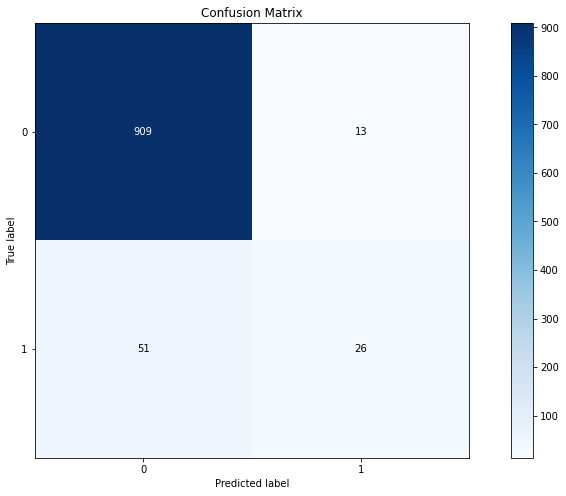

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_knn_wrapper_svm, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_knn_wrapper_svm)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       922
           1       0.67      0.34      0.45        77

    accuracy                           0.94       999
   macro avg       0.81      0.66      0.71       999
weighted avg       0.93      0.94      0.93       999



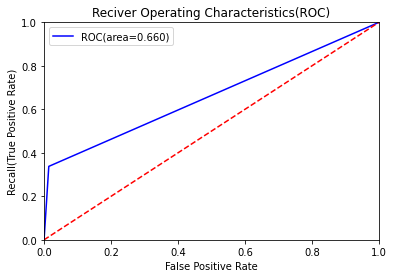

AUC: 0.66


In [ ]:
# Plot ROC curve
auc_knn_wrapper_svm = plot_ROC(y_test, y_pred_knn_wrapper_svm)

### **With the subset of features obtained from Wrapper method using KNN**

In [ ]:
x_train_knn = X_train[best_feats_bs_knn]
x_test_knn = X_test[best_feats_bs_knn]

**Decision tree Classifier**

In [ ]:
%%time
y_pred_dtc_wrapper_knn = train_and_evaluate_models(DecisionTreeClassifier, dtc_params, x_train_knn, x_test_knn, y_train, 'Decision_tree_wrapper_knn',
                                              model_key='dt')

Best parameters are:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 5, 'splitter': 'best'}
CPU times: user 28.6 s, sys: 106 ms, total: 28.7 s
Wall time: 28.7 s


In [ ]:
# Calculate metrics
acc_dtc_wrapper_knn = metrics.accuracy_score(y_test, y_pred_dtc_wrapper_knn)
f1_dtc_wrapper_knn = metrics.f1_score(y_test, y_pred_dtc_wrapper_knn, average='weighted')

print(f'Accuracy : {acc_dtc_wrapper_knn:.2}')
print(f'F1-score : {f1_dtc_wrapper_knn:.2}')

Accuracy : 0.95
F1-score : 0.94


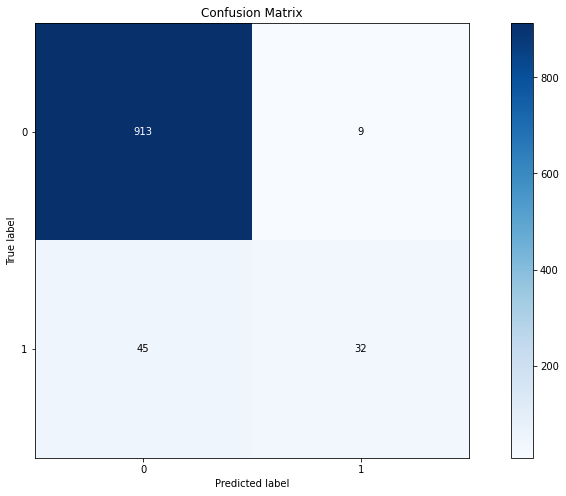

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_dtc_wrapper_knn, normalize=False,figsize=(15,8))

In [ ]:
# Classification report 
class_report = metrics.classification_report(y_test, y_pred_dtc_wrapper_knn)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       922
           1       0.78      0.42      0.54        77

    accuracy                           0.95       999
   macro avg       0.87      0.70      0.76       999
weighted avg       0.94      0.95      0.94       999



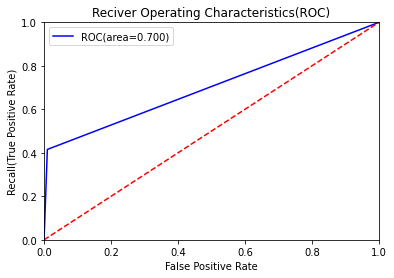

AUC: 0.7


In [ ]:
# Plot ROC curve  
auc_dtc_wrapper_knn = plot_ROC(y_test, y_pred_dtc_wrapper_knn)

**Naïve Bayes**

In [ ]:
%%time
y_pred_nb_wrapper_knn = train_and_evaluate_models(MultinomialNB, nb_params, x_train_knn, x_test_knn, y_train, 'MultinomialNB_wrapper_knn', model_key='nb')

Best parameters are:
{'alpha': 0, 'fit_prior': 'True'}
CPU times: user 351 ms, sys: 4 ms, total: 355 ms
Wall time: 360 ms


In [ ]:
# Calculate metrics
acc_nb_wrapper_knn = metrics.accuracy_score(y_test, y_pred_nb_wrapper_knn)
f1_nb_wrapper_knn = metrics.f1_score(y_test, y_pred_nb_wrapper_knn, average='weighted')

print(f'Accuracy : {acc_nb_wrapper_knn:.2}')
print(f'F1-score : {f1_nb_wrapper_knn:.2}')

Accuracy : 0.75
F1-score : 0.8


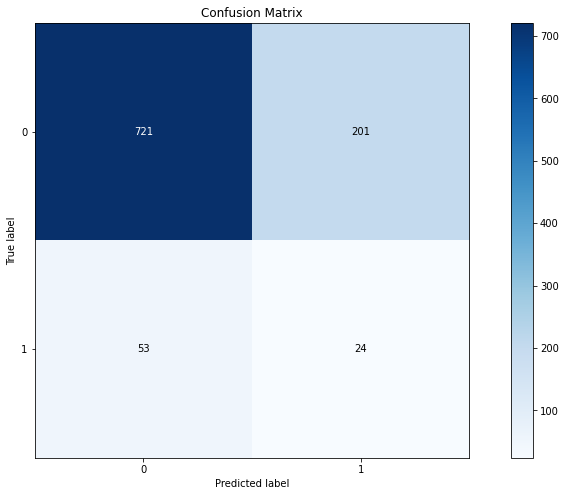

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_nb_wrapper_knn, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_nb_wrapper_knn)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       922
           1       0.11      0.31      0.16        77

    accuracy                           0.75       999
   macro avg       0.52      0.55      0.50       999
weighted avg       0.87      0.75      0.80       999



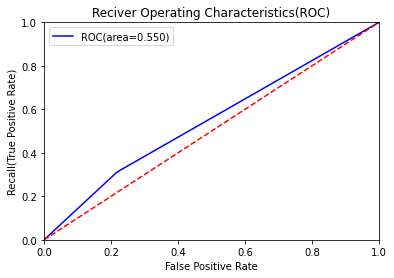

AUC: 0.55


In [ ]:
# Plot ROC curve
auc_nb_wrapper_knn = plot_ROC(y_test, y_pred_nb_wrapper_knn)

**SVM**

In [ ]:
%%time 
y_pred_svc_wrapper_knn = train_and_evaluate_models(SVC, svm_params, x_train_knn, x_test_knn, y_train, 'SVC_wrapper_knn', model_key='svm')

Best parameters are:
{'C': 0.6, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'linear'}
CPU times: user 5min 53s, sys: 353 ms, total: 5min 54s
Wall time: 5min 52s


In [ ]:
# Calculate metrics
acc_svm_wrapper_knn = metrics.accuracy_score(y_test, y_pred_svc_wrapper_knn)
f1_svm_wrapper_knn = metrics.f1_score(y_test, y_pred_svc_wrapper_knn, average='weighted')

print(f'Accuracy : {acc_svm_wrapper_knn:.2}')
print(f'F1-score : {f1_svm_wrapper_knn:.2}')

Accuracy : 0.95
F1-score : 0.94


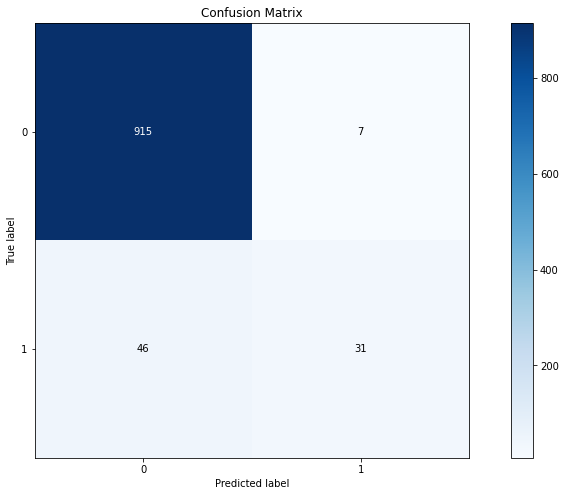

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_svc_wrapper_knn, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_svc_wrapper_knn)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       922
           1       0.82      0.40      0.54        77

    accuracy                           0.95       999
   macro avg       0.88      0.70      0.76       999
weighted avg       0.94      0.95      0.94       999



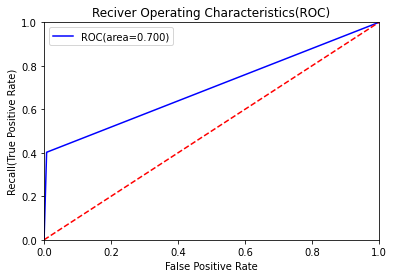

AUC: 0.7


In [ ]:
# Plot ROC curve
auc_svc_wrapper_knn = plot_ROC(y_test, y_pred_svc_wrapper_knn)

**KNN**

In [ ]:
%%time
y_pred_knn_wrapper_knn = train_and_evaluate_models(KNeighborsClassifier, knn_params, x_train_knn, x_test_knn, y_train, 'KNN_wrapper_knn', model_key='knn')

Best parameters are:
{'n_neighbors': 2, 'weights': 'uniform'}
CPU times: user 1.16 s, sys: 16 ms, total: 1.18 s
Wall time: 1.18 s


In [ ]:
# Calculate metrics
acc_knn_wrapper_knn = metrics.accuracy_score(y_test, y_pred_knn_wrapper_knn)
f1_knn_wrapper_knn = metrics.f1_score(y_test, y_pred_knn_wrapper_knn, average='weighted')

print(f'Accuracy : {acc_knn_wrapper_knn:.2}')
print(f'F1-score : {f1_knn_wrapper_knn:.2}')

Accuracy : 0.94
F1-score : 0.93


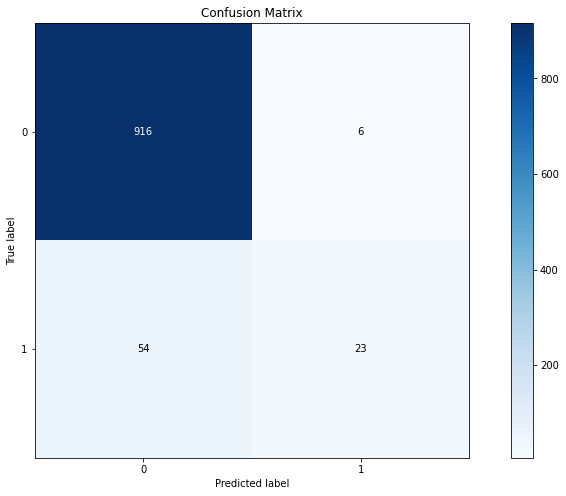

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_knn_wrapper_knn, normalize=False,figsize=(15,8))

In [ ]:
# Classification report
class_report = metrics.classification_report(y_test, y_pred_knn_wrapper_knn)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       922
           1       0.79      0.30      0.43        77

    accuracy                           0.94       999
   macro avg       0.87      0.65      0.70       999
weighted avg       0.93      0.94      0.93       999



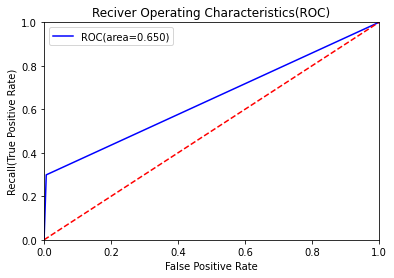

AUC: 0.65


In [ ]:
# Plot ROC curve
auc_knn_wrapper_knn = plot_ROC(y_test, y_pred_knn_wrapper_knn)

## Compare the performance of models

In [ ]:
models = ['Filter_dtc', 'Filter_nb', 'Filter_svm', 'Filter_knn', 'dtc_Wrapper_dtc', 'dtc_Wrapper_nb', 'dtc_Wrapper_svm', 'dtc_Wrapper_knn', \
          'nb_Wrapper_dtc', 'nb_Wrapper_nb', 'nb_Wrapper_svm', 'nb_Wrapper_knn', 'svm_Wrapper_dtc', 'svm_Wrapper_nb', 'svm_Wrapper_svm',\
          'svm_Wrapper_knn', 'knn_Wrapper_dtc', 'knn_Wrapper_nb', 'knn_Wrapper_svm', 'knn_Wrapper_knn']
accuracies = [acc_dtc_filter, acc_nb_filter, acc_svm_filter, acc_knn_filter, acc_dtc_wrapper_dtc, acc_nb_wrapper_dtc, acc_svm_wrapper_dtc, \
              acc_knn_wrapper_dtc, acc_dtc_wrapper_nb, acc_nb_wrapper_nb, acc_svm_wrapper_nb, acc_knn_wrapper_nb, acc_dtc_wrapper_svm,\
              acc_nb_wrapper_svm, acc_svm_wrapper_svm, acc_knn_wrapper_svm, acc_dtc_wrapper_knn, acc_nb_wrapper_knn, acc_svm_wrapper_knn,\
              acc_knn_wrapper_knn]
f1_scores = [f1_dtc_filter, f1_nb_filter, f1_svm_filter, f1_knn_filter, f1_dtc_wrapper_dtc, f1_nb_wrapper_dtc, f1_svm_wrapper_dtc, \
              f1_knn_wrapper_dtc, f1_dtc_wrapper_nb, f1_nb_wrapper_nb, f1_svm_wrapper_nb, f1_knn_wrapper_nb, f1_dtc_wrapper_svm,\
              f1_nb_wrapper_svm, f1_svm_wrapper_svm, f1_knn_wrapper_svm, f1_dtc_wrapper_knn, f1_nb_wrapper_knn, f1_svm_wrapper_knn,\
              f1_knn_wrapper_knn]
auc_scores = [auc_dtc_filter, auc_nb_filter, auc_svc_filter, auc_knn_filter, auc_dtc_wrapper_dtc, auc_nb_wrapper_dtc, auc_svc_wrapper_dtc, \
              auc_knn_wrapper_dtc, auc_dtc_wrapper_nb, auc_nb_wrapper_nb, auc_svc_wrapper_nb, auc_knn_wrapper_nb, auc_dtc_wrapper_svm,\
              auc_nb_wrapper_svm, auc_svc_wrapper_svm, auc_knn_wrapper_svm, auc_dtc_wrapper_knn, auc_nb_wrapper_knn, auc_svc_wrapper_knn,\
              auc_knn_wrapper_knn]

results_df = pd.DataFrame()
results_df['Models'] = models  
results_df['Accuracy'] = accuracies
results_df['F1-score'] = f1_scores 
results_df['AUC-score'] = auc_scores

results_df = results_df.sort_values(by='F1-score', ascending=False).reset_index(drop=True)
results_df.index+=1
results_df

,Models,Accuracy,F1-score,AUC-score
1,knn_Wrapper_svm,0.946947,0.938500,0.70
2,nb_Wrapper_svm,0.945946,0.938218,0.70
3,svm_Wrapper_dtc,0.945946,0.938218,0.70
4,Filter_svm,0.945946,0.938218,0.70
5,dtc_Wrapper_dtc,0.945946,0.938218,0.70
6,dtc_Wrapper_svm,0.945946,0.938218,0.70
7,nb_Wrapper_dtc,0.945946,0.938218,0.70
8,knn_Wrapper_dtc,0.945946,0.938218,0.70
9,svm_Wrapper_svm,0.945946,0.938218,0.70
10,Filter_knn,0.940941,0.929453,0.66


Insights:   
* Best model is knn_Wrapper_svm, the KNN classifier is trained on svm features obtained from Wrapper feature selection method. 
* 2nd best model is nb_Wrapper_svm, the Naive Bayes classifier is trained on svm features obtained from Wrapper feature selection method. 
* Worst model is svm_Wrapper_nb, the SVM classifier trained on nb features obtained from Wrapper method.   
* Features obtained from Wrapper method using Naive Bayes are worst in terms of models performance.